# Predicting SONAR rocks against Mines with the help of Machine Learning. 


In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Import the data 
M--> Mine   
R-->Rock

In [2]:
df=pd.read_csv('sonar data.csv',header=None)

In [3]:
# Let's see the data Frame 
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [4]:
# Let's see the shape
df.shape

(208, 61)

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [6]:

df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [7]:
df.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [8]:
x=df.drop(columns=60,axis=1)
y=df[60]

In [9]:
x.shape,y.shape

((208, 60), (208,))

In [10]:
y

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object

# split the data into training and test data

In [11]:
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [12]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((166, 60), (42, 60), (166,), (42,))

# Let's try different Mechine Learning Model for the problem

In [13]:
# Create a dictionary for differnt model
models={"Logistic Regression":LogisticRegression(),"KNN":KNeighborsClassifier(),
       "Random Forest":RandomForestClassifier()}

# Create a function to fit and score models 
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_scores={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
    return model_scores    

In [14]:
models_scores = fit_and_score(models=models,x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
models_scores

{'Logistic Regression': 0.7857142857142857,
 'KNN': 0.8571428571428571,
 'Random Forest': 0.8571428571428571}

# According to the model score dictionary the KNeighborsClassifier and RandomForestClassifier have the best score 85% 

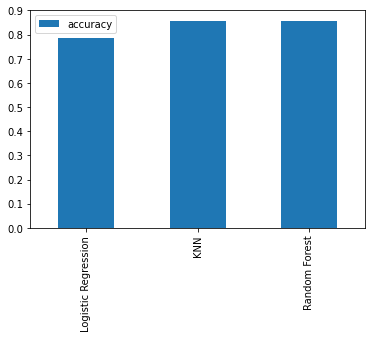

In [15]:
model_compare=pd.DataFrame(models_scores,index=["accuracy"])
model_compare.T.plot.bar();

In [16]:
log_reg_grid={"C":np.logspace(-4,4,20),"solver":["liblinear"]}
np.random.seed(42)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [17]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 11.288378916846883}

In [18]:
rs_log_reg.score(x_test,y_test)

0.7857142857142857

In [19]:
gs_log_reg=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,
                       cv=5,verbose=True)
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [20]:
gs_log_reg.best_params_

{'C': 11.288378916846883, 'solver': 'liblinear'}

In [21]:
gs_log_reg.score(x_test,y_test)

0.7857142857142857

In [22]:
clf=LogisticRegression(C=11.288378916846883,solver='liblinear')
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.7857142857142857

# We don't use Logistic Regression as it give's accuracy 78% on it's best parameter's.

In [23]:
# Let,s change the 'n_neighbors' parameter of KNeKNeighborsClassifier 

train_scores=[]
test_scores=[]
neighbors=range(1,21)
knn=KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

In [24]:
train_scores

[1.0,
 0.8734939759036144,
 0.8674698795180723,
 0.8554216867469879,
 0.8373493975903614,
 0.8192771084337349,
 0.8132530120481928,
 0.7710843373493976,
 0.8012048192771084,
 0.7168674698795181,
 0.7108433734939759,
 0.6927710843373494,
 0.6807228915662651,
 0.6626506024096386,
 0.6987951807228916,
 0.6867469879518072,
 0.6927710843373494,
 0.6987951807228916,
 0.7228915662650602,
 0.6987951807228916]

In [25]:
test_scores

[0.8809523809523809,
 0.8809523809523809,
 0.8809523809523809,
 0.9047619047619048,
 0.8571428571428571,
 0.8095238095238095,
 0.8095238095238095,
 0.7857142857142857,
 0.8333333333333334,
 0.7857142857142857,
 0.7619047619047619,
 0.7857142857142857,
 0.7619047619047619,
 0.7619047619047619,
 0.7619047619047619,
 0.7619047619047619,
 0.7380952380952381,
 0.7380952380952381,
 0.7142857142857143,
 0.7619047619047619]

Maximum KNN score on the test data :90.48%


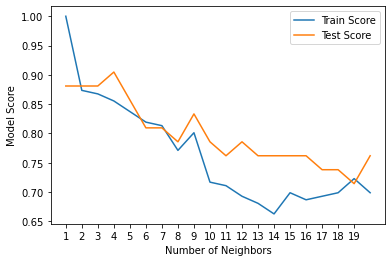

In [26]:
plt.plot(neighbors,train_scores,label="Train Score")
plt.plot(neighbors,test_scores,label="Test Score")
plt.xticks(np.arange(1,20,1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()
print(f"Maximum KNN score on the test data :{max(test_scores)*100:.2f}%")

# According to the above graph we see the max accuracy for KNeighborsClassifier is 90%  

In [33]:
# Let's try Random Search CV for KNeighborsClassifier
knn_grid={"n_neighbors":np.arange(1,10)}
np.random.seed(42)
knn_reg=RandomizedSearchCV(KNeighborsClassifier(),param_distributions=knn_grid
                          ,cv=5,n_iter=20,verbose=True)
knn_reg.fit(x_train,y_train)

/home/subhadip/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 9 is smaller than n_iter=20. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 9 candidates, totalling 45 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
                   verbose=True)

In [34]:
knn_reg.best_params_

{'n_neighbors': 1}

In [37]:
knn_reg.score(x_test,y_test)

0.8809523809523809

In [36]:
clf=KNeighborsClassifier(n_neighbors=4)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.9047619047619048

In [38]:
gs_knn=GridSearchCV(KNeighborsClassifier(),param_grid=knn_grid,
                       cv=5,verbose=True)
gs_knn.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             verbose=True)

In [39]:
gs_knn.best_params_

{'n_neighbors': 1}

In [41]:
y_preds=clf.predict(x_test)
y_preds

array(['M', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'R', 'R', 'M', 'R', 'M',
       'M', 'M', 'M', 'R', 'M', 'R', 'R', 'M', 'M', 'M', 'M', 'R', 'R',
       'R', 'M', 'M', 'M', 'M', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'R',
       'M', 'R', 'M'], dtype=object)

/home/subhadip/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


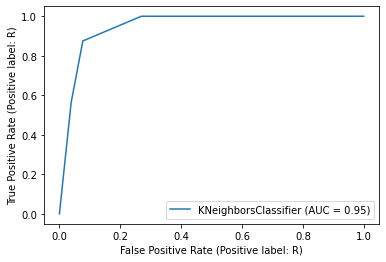

In [43]:
plot_roc_curve(clf,x_test,y_test)

In [44]:
print(confusion_matrix(y_test,y_preds))

[[24  2]
 [ 2 14]]


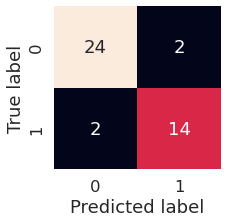

In [45]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

In [46]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        26
           R       0.88      0.88      0.88        16

    accuracy                           0.90        42
   macro avg       0.90      0.90      0.90        42
weighted avg       0.90      0.90      0.90        42



In [53]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        26
           R       0.88      0.88      0.88        16

    accuracy                           0.90        42
   macro avg       0.90      0.90      0.90        42
weighted avg       0.90      0.90      0.90        42



In [54]:
import pickle
pickle.dump(clf,open("Rock_Vs_Mine.pkl","wb"))